<a href="https://colab.research.google.com/github/SixDevelop/Research-work/blob/main/%D0%9D%D0%98%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт датасета и его анализ



---



**Импорты**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import csv
from matplotlib.figure import Figure 
from matplotlib.axes import Axes
from numpy import ndarray
from collections import Counter
import matplotlib.gridspec as gridspec

**Получение csv таблицы**

In [61]:
full_data = pd.read_table("/validated.tsv", sep='\t')
full_data.to_csv('validated.csv', index=False)
full_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


**Вывод графика полных данных по полу без очистки таблицы от незаполненных полей**

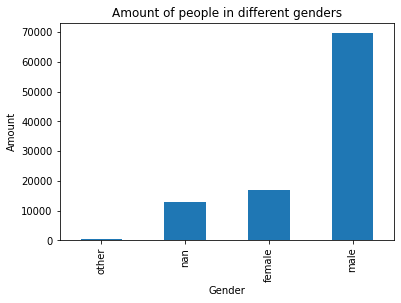

In [62]:
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()


**Исключение ненужных полей из графика**

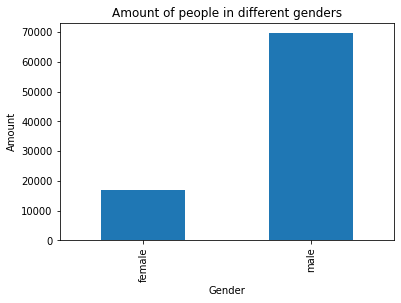

In [53]:

full_data = full_data[full_data.gender.notnull()]
full_data = full_data[full_data.gender != 'other']
full_data.head()
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тренировочных данных

In [51]:
train_data = pd.read_table("/train.tsv", sep='\t')
train_data.to_csv('train.csv', index=False)
train_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949650.mp3,Теперь слово предоставляется Генеральному секр...,2,0,teens,male,NaN,ru,NaN
1,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949651.mp3,"В португальском языке такие слова, как жизнь, ...",2,0,teens,male,NaN,ru,NaN
2,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949693.mp3,За прошедший год значительно продвинулось суде...,2,0,teens,male,NaN,ru,NaN
3,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949699.mp3,Я предоставляю слово наблюдателю от Святого Пр...,2,0,teens,male,NaN,ru,NaN
4,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949704.mp3,Швейцария стала одним из ее авторов.,2,0,teens,male,NaN,ru,NaN


Вывод графика тренировочных данных без очистки

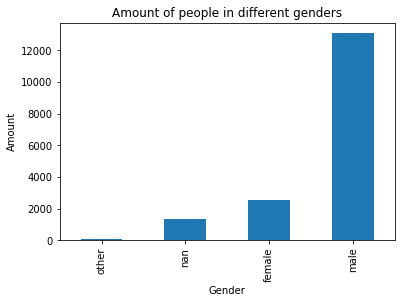

In [55]:
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Исключение ненужных полей из графика

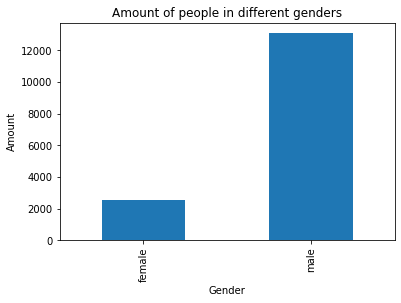

In [56]:
train_data = train_data[train_data.gender.notnull()]
train_data = train_data[train_data.gender != 'other']
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тестовых данных

In [57]:
test_data = pd.read_table("/test.tsv", sep='\t')
test_data.to_csv('test.csv', index=False)
test_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


Вывод графика тестовых данных без очистки

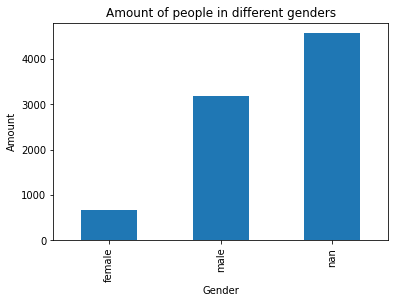

In [58]:
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Очистка тестовых данных

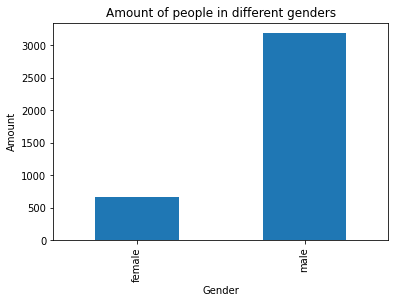

In [59]:
test_data = test_data[test_data.gender.notnull()]
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()